In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.shape

(17000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
X = df.values[:,:-1]
y = df.values[:,-1]

## Feature Scaling

In [8]:
def feature_scaling(data):
    mu = np.mean(data)
    std = np.std(data)
    return (data - mu)/std

In [9]:
X_scale = feature_scaling(X)
y_scale = feature_scaling(y)

In [13]:
y_scale

array([-1.21055773, -1.09674535, -1.04846131, ..., -0.89412482,
       -1.04759909, -0.97172417])

## Output

In [14]:
def output(X, w, b):
    return np.dot(X, w)+b

## Cost function

In [15]:
def cost_function(X, y, w, b):
    m = X.shape[0]
    y_pred = output(X, w, b)
    return (1/(2*m))*np.dot((y-y_pred),(y-y_pred))

## Gradient Descent

In [43]:
def gradient_descent(X, y, w, b, iterations = 1000, learning_rate = 0.08, stopping_threshold = 1e-5):
    m, n = X.shape[0], X.shape[1]
    current_weights, current_bias = w, b
    previous_cost = 0
    dj_dw = np.zeros(n)
    dj_db = 0
    count = 0
    cost = []
    for i in range(iterations):
        f_wb = output(X, current_weights, current_bias)
        current_cost = cost_function(X, y, current_weights, current_bias)
        if (abs(current_cost - previous_cost) <= stopping_threshold) or current_cost>=1e+100:
            break
        previous_cost = current_cost
        cost.append(current_cost)
        count+=1
        dj_dw = (1/m)*np.dot((f_wb - y),X)
        dj_db = (1/m)*np.sum(f_wb - y)
        current_weights = current_weights - learning_rate*dj_dw
        current_bias = current_bias - learning_rate*dj_db
        print(f"Iteration {i+1}: Cost {current_cost}")
    return current_weights, current_bias, count, cost

In [39]:
'''
Coefficient (slope): [-5.45310861e+02 -5.42606226e+02  1.45454734e+01 -1.05906115e-01
  1.48714807e+00 -4.86521139e-01  5.74338295e-01  5.12033613e+02]
Intercept: -316.4819389009248
'''

# w = np.array([-500,-500,20,-0.1,2,-0.4,0.6,600])
# b = -250
w = np.array([-5e+02, -5e+02,  1.6e+01,
       -10e-02,  1.6e+00, -5e-01,  6e-01,
        5e+02])
b = -3e+02

In [40]:
w1, b1, count1, cost1 = gradient_descent(X_scale, y_scale, w, b, learning_rate = 0.8) #learning_rate lớn

Iteration 1: Cost 270.70849347696435
Iteration 2: Cost 4187.113504289581
Iteration 3: Cost 109819.18069851272
Iteration 4: Cost 2881235.8986087544
Iteration 5: Cost 75593026.71235815
Iteration 6: Cost 1983283185.7400024
Iteration 7: Cost 52034061743.1289
Iteration 8: Cost 1365182542537.8682
Iteration 9: Cost 35817372544645.766
Iteration 10: Cost 939716218182391.2
Iteration 11: Cost 2.4654699883814668e+16
Iteration 12: Cost 6.468487130473166e+17
Iteration 13: Cost 1.6970932907021509e+19
Iteration 14: Cost 4.452549072530312e+20
Iteration 15: Cost 1.1681852348310275e+22
Iteration 16: Cost 3.064888720253253e+23
Iteration 17: Cost 8.041141582220351e+24
Iteration 18: Cost 2.1097000200376056e+26
Iteration 19: Cost 5.535077487489894e+27
Iteration 20: Cost 1.4522009054145689e+29
Iteration 21: Cost 3.810041457329723e+30
Iteration 22: Cost 9.996148502900918e+31
Iteration 23: Cost 2.6226219848557634e+33
Iteration 24: Cost 6.880796212113817e+34
Iteration 25: Cost 1.8052680403822556e+36
Iteration 26

In [41]:
w2, b2, count2, cost2 = gradient_descent(X_scale, y_scale, w, b, learning_rate = 0.000001) #learning_rate nhỏ

Iteration 1: Cost 270.70849347696435
Iteration 2: Cost 270.70579704325866
Iteration 3: Cost 270.7031006475127
Iteration 4: Cost 270.7004042897249
Iteration 5: Cost 270.6977079698962
Iteration 6: Cost 270.6950116880253
Iteration 7: Cost 270.6923154441114
Iteration 8: Cost 270.68961923815374
Iteration 9: Cost 270.68692307015215
Iteration 10: Cost 270.6842269401059
Iteration 11: Cost 270.68153084801435
Iteration 12: Cost 270.6788347938772
Iteration 13: Cost 270.6761387776931
Iteration 14: Cost 270.67344279946286
Iteration 15: Cost 270.6707468591862
Iteration 16: Cost 270.6680509568613
Iteration 17: Cost 270.6653550924875
Iteration 18: Cost 270.6626592660654
Iteration 19: Cost 270.6599634775933
Iteration 20: Cost 270.65726772707046
Iteration 21: Cost 270.65457201449567
Iteration 22: Cost 270.6518763398705
Iteration 23: Cost 270.64918070319237
Iteration 24: Cost 270.64648510446204
Iteration 25: Cost 270.6437895436782
Iteration 26: Cost 270.6410940208411
Iteration 27: Cost 270.6383985359505


In [44]:
w3, b3, count3, cost3 = gradient_descent(X_scale, y_scale, w, b, learning_rate = 0.2)

Iteration 1: Cost 270.70849347696435
Iteration 2: Cost 111.01732730595705
Iteration 3: Cost 52.06920346795691
Iteration 4: Cost 27.18283302550941
Iteration 5: Cost 15.261848944055984
Iteration 6: Cost 8.990331489211284
Iteration 7: Cost 5.493343588696957
Iteration 8: Cost 3.4787658227672518
Iteration 9: Cost 2.297013457769652
Iteration 10: Cost 1.5959868908934365
Iteration 11: Cost 1.1763629099968727
Iteration 12: Cost 0.9226930162012574
Iteration 13: Cost 0.767333551125091
Iteration 14: Cost 0.6704213144996491
Iteration 15: Cost 0.6083934466654212
Iteration 16: Cost 0.5672966766789576
Iteration 17: Cost 0.5388561293108295
Iteration 18: Cost 0.5181564278596612
Iteration 19: Cost 0.5022712392989804
Iteration 20: Cost 0.4894525856726738
Iteration 21: Cost 0.4786510494903096
Iteration 22: Cost 0.46923172906619026
Iteration 23: Cost 0.46080603871243725
Iteration 24: Cost 0.453132079357285
Iteration 25: Cost 0.4460556020136625
Iteration 26: Cost 0.4394750041614433
Iteration 27: Cost 0.43332

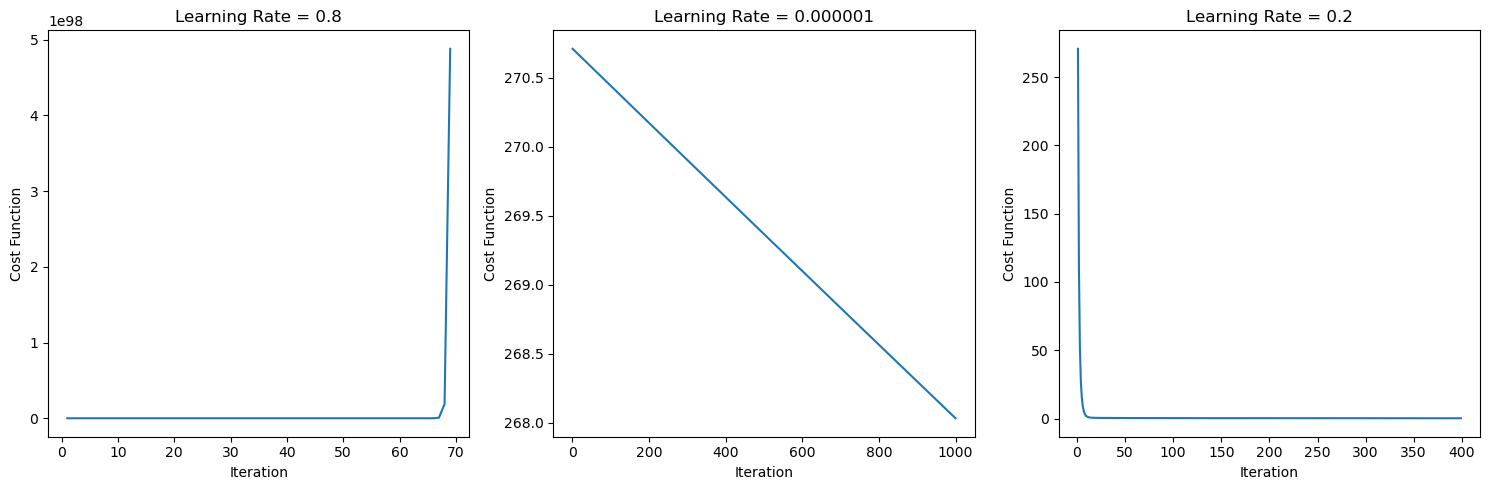

In [37]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
# learning rate quá lớn
axes[0].plot(np.arange(1,count1+1), np.array(cost1));
axes[0].set_title('Learning Rate = 0.8');
axes[0].set_xlabel('Iteration');
axes[0].set_ylabel('Cost Function');
# learning rate quá nhỏ
axes[1].plot(np.arange(1,count2+1), np.array(cost2));
axes[1].set_title('Learning Rate = 0.000001');
axes[1].set_xlabel('Iteration');
axes[1].set_ylabel('Cost Function');
# learning rate phù hợp
axes[2].plot(np.arange(1,count3+1), np.array(cost3));
axes[2].set_title('Learning Rate = 0.2');
axes[2].set_xlabel('Iteration');
axes[2].set_ylabel('Cost Function');
# Cách đều các đồ thị để nhìn cho đẹp
plt.tight_layout()

## Normal Equation

In [18]:
X_normal = np.column_stack((np.ones(len(X_scale)), X_scale))

In [19]:
Theta = (np.linalg.inv(X_normal.T@X_normal))@X_normal.T@y_scale

In [53]:
print('Theta from normal equation: ', Theta)
print('Theta from gradient descent', np.insert(w3,0, b3))

Theta from normal equation:  [-2.74662856e+02 -4.70175206e+02 -4.67843228e+02  1.25413253e+01
 -9.13138404e-02  1.28224137e+00 -4.19485824e-01  4.95203089e-01
  4.41483061e+02]
Theta from gradient descent [-2.88697044e+02 -5.06729640e+02 -5.05334149e+02  1.06787771e+01
 -1.43279062e-01  1.68889909e+00 -3.53954161e-01  1.06610855e-01
  4.94332434e+02]


Ta có thể giá trị tìm được ở 2 phương pháp gradient descent và normal equation là xấp xỉ nhau.